In [3]:
# Download Opportunity dataset from UCI repository
!wget -c https://archive.ics.uci.edu/static/public/226/opportunity+activity+recognition.zip -O opportunity_dataset.zip

# Unzip the dataset
!unzip -q opportunity_dataset.zip -d opportunity_dataset


--2025-09-04 10:32:32--  https://archive.ics.uci.edu/static/public/226/opportunity+activity+recognition.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘opportunity_dataset.zip’

opportunity_dataset     [       <=>          ] 292.43M  57.6MB/s    in 5.4s    

2025-09-04 10:32:38 (54.4 MB/s) - ‘opportunity_dataset.zip’ saved [306636009]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
# Path to one of the dataset files (example: Subject 1 - ADL1)
file_path = "opportunity_dataset/OpportunityUCIDataset/dataset/S1-ADL1.dat"

# Load with whitespace delimiter, ignoring comment lines
data = pd.read_csv(file_path, sep=r"\s+", header=None)

# Show shape and first few rows
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (51116, 250)


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,5789.0,2907.0,1447.0,0,0,0,0,0,0,0
1,33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,5789.0,2908.0,1443.0,0,0,0,0,0,0,0
2,67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,5789.0,2910.0,1440.0,0,0,0,0,0,0,0
3,100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,5789.0,2912.0,1440.0,0,0,0,0,0,0,0
4,133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,5791.0,2915.0,1442.0,0,0,0,0,0,0,0


In [6]:
num_features = data.shape[1] - 1  # last column is label
columns = [f"feat_{i}" for i in range(num_features)] + ["label"]
data.columns = columns


In [7]:
# Check label distribution
print("Label distribution:")
print(data['label'].value_counts())

# Summary statistics
print("\nDataset Statistics:")
print(data.describe())

# Missing values
print("\nMissing values per column:")
print(data.isna().sum().sum())


Label distribution:
label
0         46272
407521     1153
406516      452
404517      405
406520      384
406517      329
404516      271
404508      249
404520      244
406511      200
404511      199
408512      197
406508      197
404519      152
406519      149
404505      107
406505       99
405506       57
Name: count, dtype: int64

Dataset Statistics:
             feat_0        feat_1        feat_2        feat_3        feat_4  \
count  5.111600e+04  50205.000000  50205.000000  50205.000000  50650.000000   
mean   8.519081e+05    -16.378508    744.377930    226.679215   -159.489556   
std    4.918638e+05    393.141918    432.372466    631.169189    198.712459   
min    0.000000e+00  -3955.000000  -4288.000000  -6519.000000  -1330.000000   
25%    4.259538e+05   -147.000000    526.000000   -360.000000   -266.000000   
50%    8.519080e+05    -31.000000    916.000000    312.000000   -104.000000   
75%    1.277862e+06     68.000000    980.000000    614.000000    -26.000000   
max    

/tmp/ipython-input-3436886139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=data, palette="viridis")


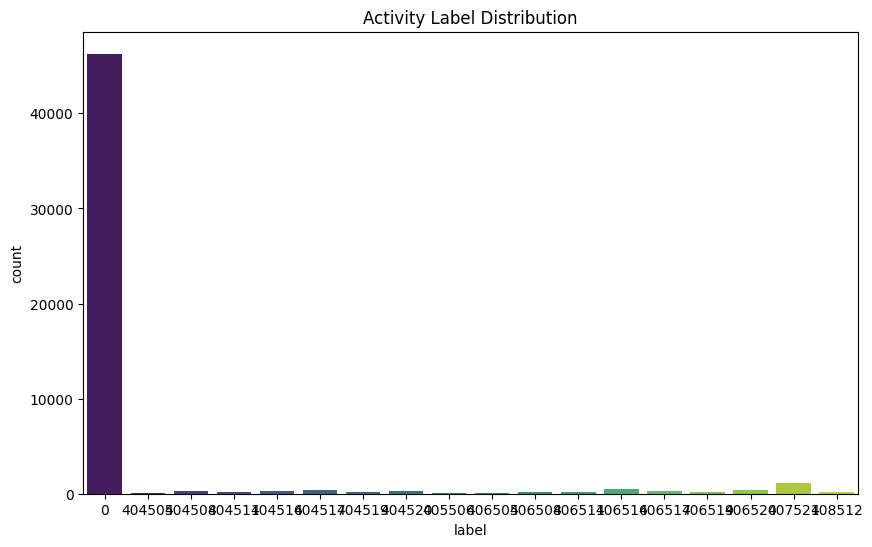

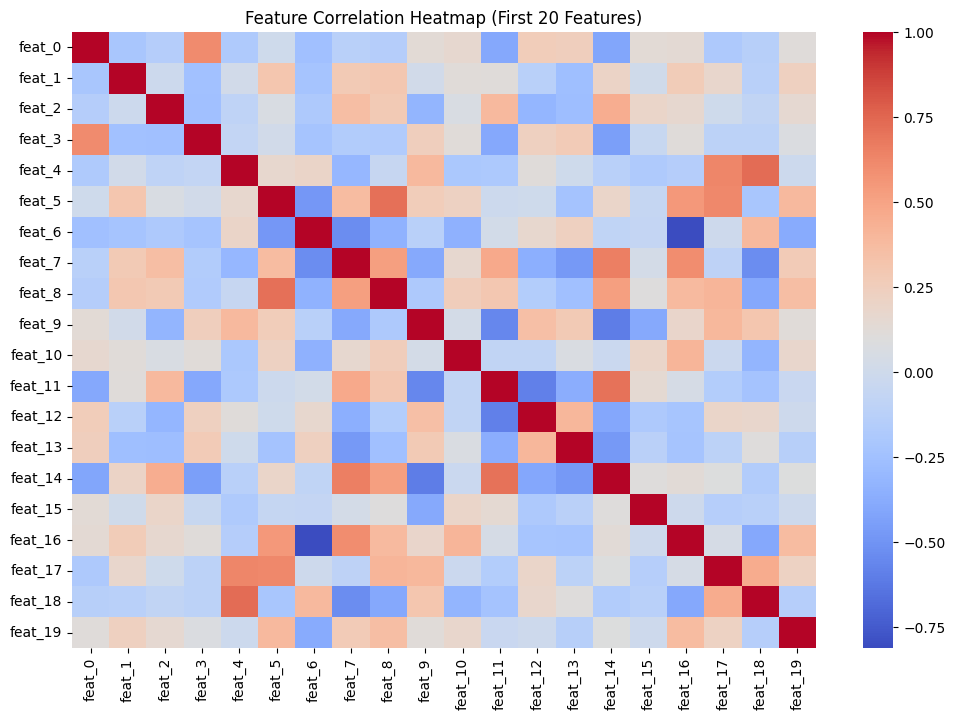

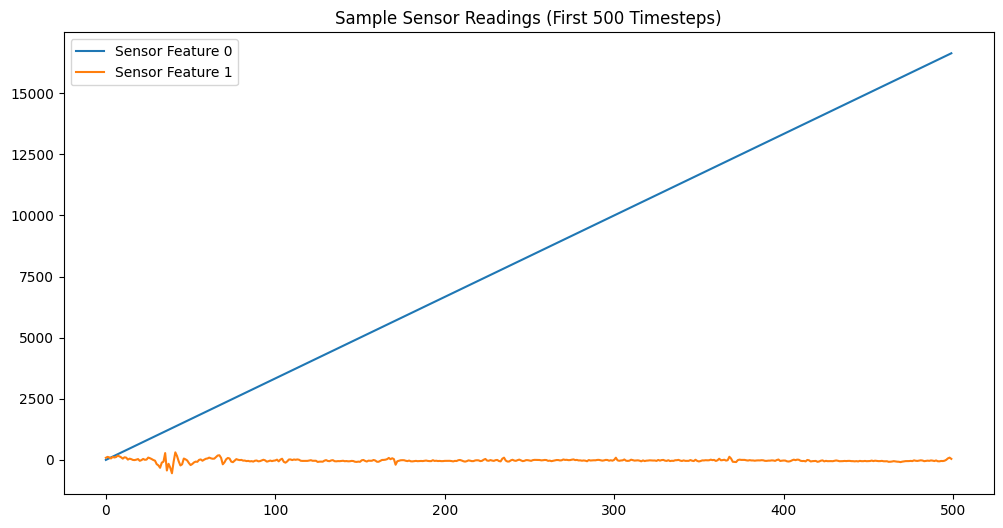

In [8]:
# Plot label distribution
plt.figure(figsize=(10,6))
sns.countplot(x="label", data=data, palette="viridis")
plt.title("Activity Label Distribution")
plt.show()

# Correlation heatmap (for first 20 features to avoid clutter)
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:, :20].corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap (First 20 Features)")
plt.show()

# Sample time-series plot for one feature
plt.figure(figsize=(12,6))
plt.plot(data['feat_0'][:500], label="Sensor Feature 0")
plt.plot(data['feat_1'][:500], label="Sensor Feature 1")
plt.legend()
plt.title("Sample Sensor Readings (First 500 Timesteps)")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load one dataset file again (e.g., S1-ADL1)
file_path = "opportunity_dataset/OpportunityUCIDataset/dataset/S1-ADL1.dat"
data = pd.read_csv(file_path, sep=r"\s+", header=None)

# Assign column names (241 features + 1 label)
num_features = data.shape[1] - 1
columns = [f"feat_{i}" for i in range(num_features)] + ["label"]
data.columns = columns

# Quick check
print("Dataset shape:", data.shape)


Dataset shape: (51116, 250)


/tmp/ipython-input-1587998077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=data, palette="tab10")


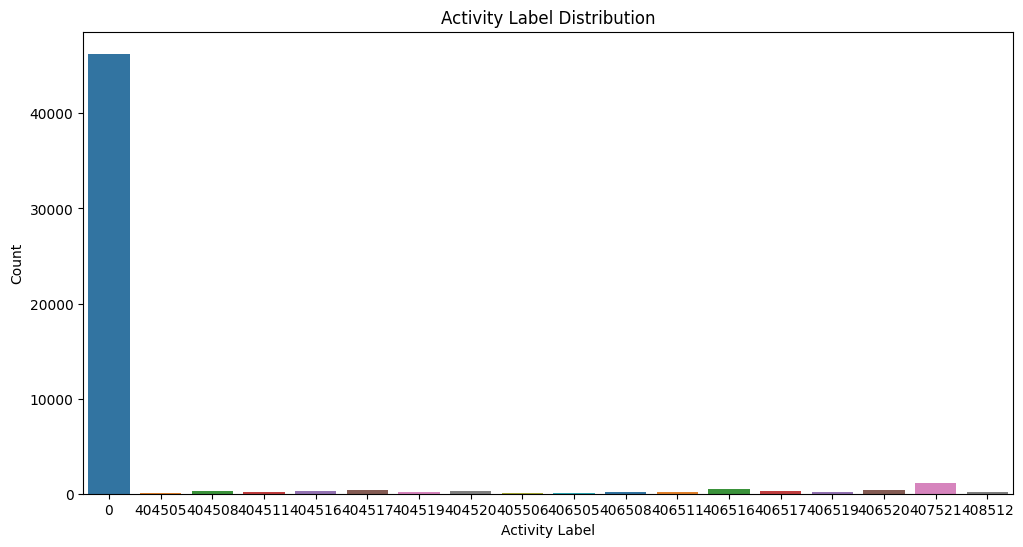

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x="label", data=data, palette="tab10")
plt.title("Activity Label Distribution")
plt.xlabel("Activity Label")
plt.ylabel("Count")
plt.show()

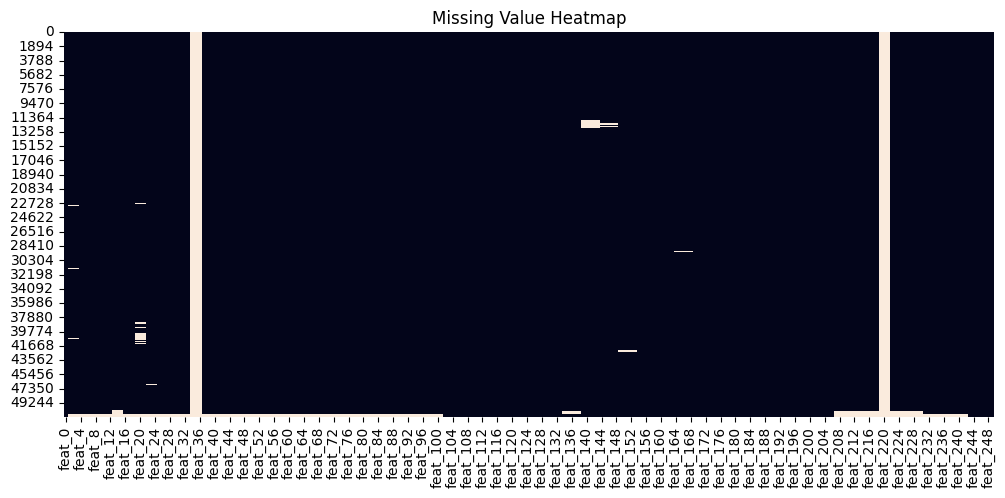

Top 10 features with most missing values:
 feat_36     0.999980
feat_35     0.999980
feat_34     0.999980
feat_220    0.999980
feat_219    0.999980
feat_221    0.999980
feat_21     0.040672
feat_19     0.040672
feat_20     0.040672
feat_14     0.023691
dtype: float64


In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

missing_ratio = data.isnull().mean().sort_values(ascending=False).head(10)
print("Top 10 features with most missing values:\n", missing_ratio)


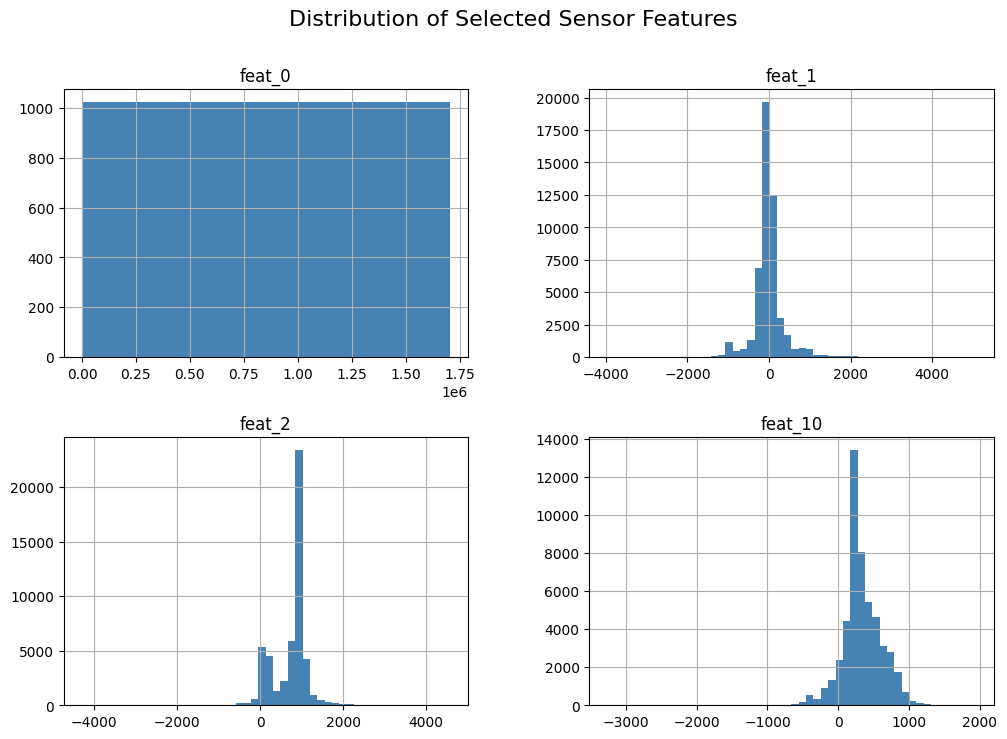

In [12]:
sample_feats = ["feat_0", "feat_1", "feat_2", "feat_10"]
data[sample_feats].hist(figsize=(12,8), bins=50, color='steelblue')
plt.suptitle("Distribution of Selected Sensor Features", fontsize=16)
plt.show()


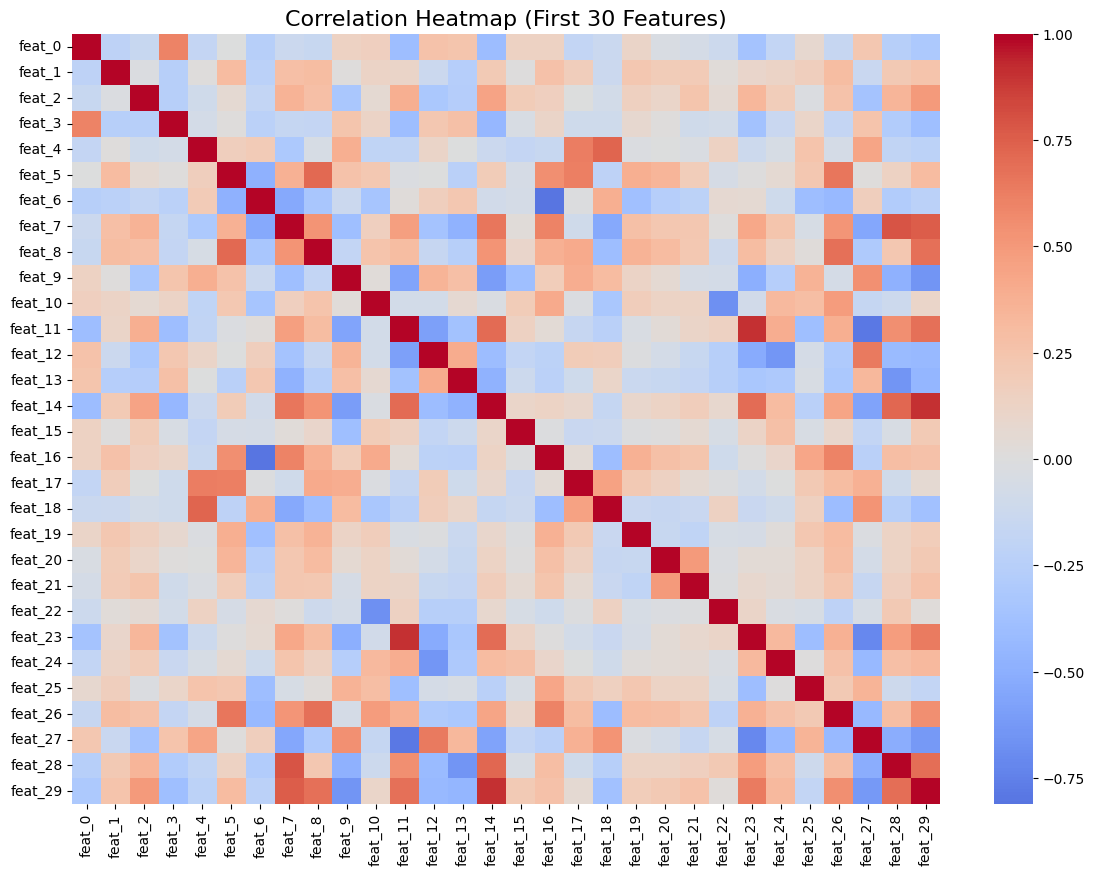

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(data.iloc[:, :30].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (First 30 Features)", fontsize=16)
plt.show()


/tmp/ipython-input-1912025883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="feat_0", data=data.sample(5000), palette="Set2")


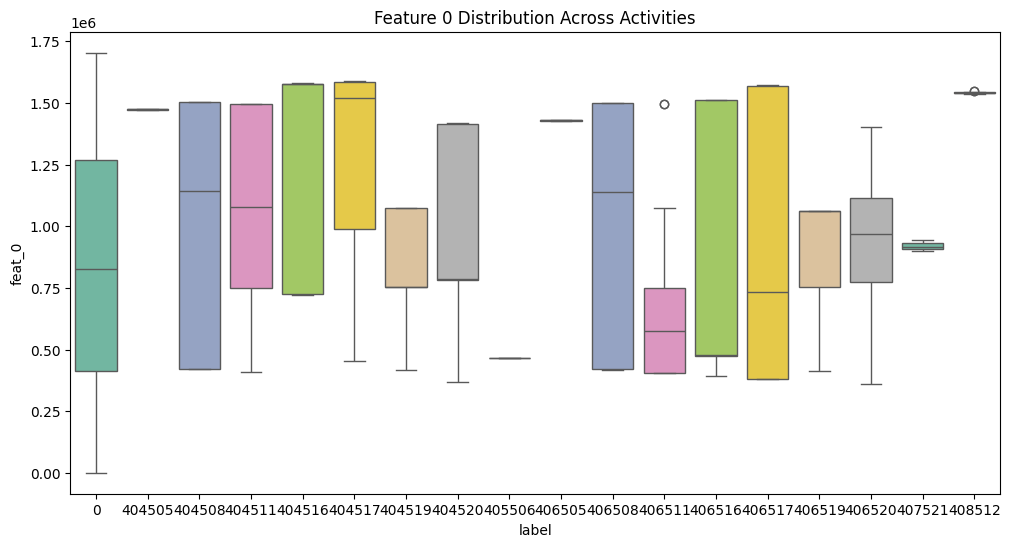

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="label", y="feat_0", data=data.sample(5000), palette="Set2")
plt.title("Feature 0 Distribution Across Activities")
plt.show()

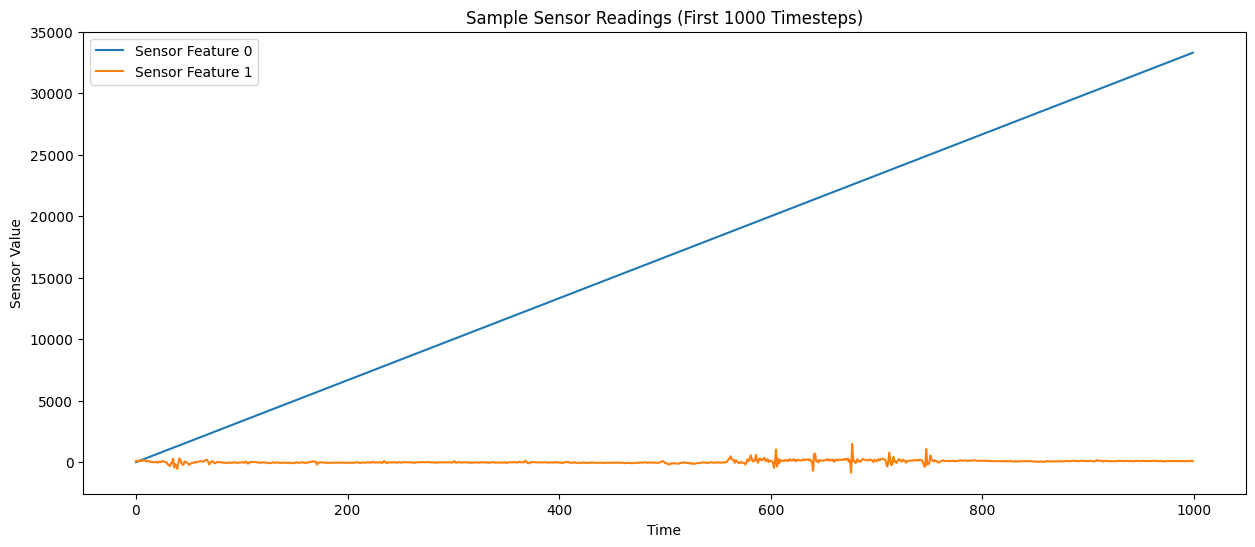

In [15]:
plt.figure(figsize=(15,6))
plt.plot(data["feat_0"][:1000], label="Sensor Feature 0")
plt.plot(data["feat_1"][:1000], label="Sensor Feature 1")
plt.legend()
plt.title("Sample Sensor Readings (First 1000 Timesteps)")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


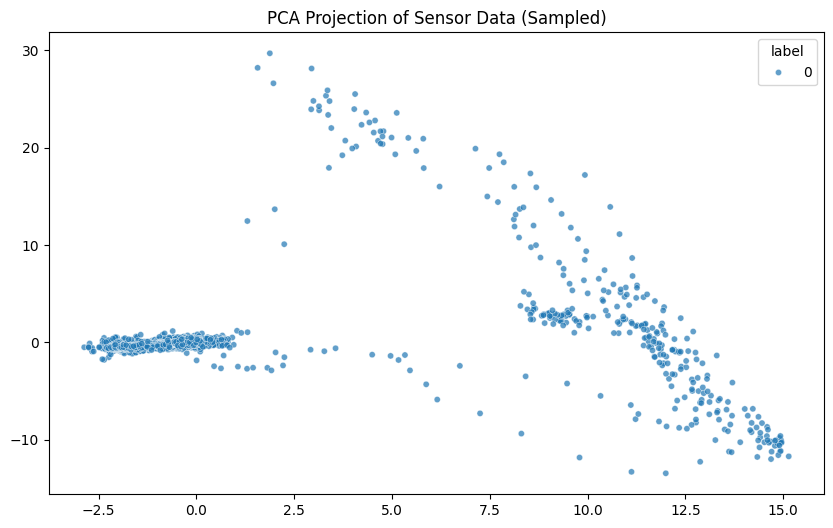

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].fillna(0)  # features
y = data['label']

# Standardize & reduce
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled[:5000])  # sample for speed

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y[:5000], palette="tab10", s=20, alpha=0.7)
plt.title("PCA Projection of Sensor Data (Sampled)")
plt.show()
